In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Your API key (replace with your actual key)
#api_key = 'Enter API Key here'

# Import the Flight API key
from api_keys import flight_api_key


# List of major airports in Florida
florida_airports = ['MIA', 'FLL', 'TPA', 'MCO', 'JAX', 'RSW', 'PBI', 'PNS']

# Initialize an empty DataFrame to hold all data
florida_flights = pd.DataFrame()

for airport in florida_airports:
    # API endpoint with the correct access key and filtering for a specific Florida airport
    url = f"http://api.aviationstack.com/v1/flights?access_key={flight_api_key}&dep_iata={airport}"
    response = requests.get(url)
    
    if response.status_code == 200:
        # Load the data into a temporary DataFrame
        temp_df = pd.json_normalize(response.json()['data'])
        # Append the temporary DataFrame to the main Florida flights DataFrame
        florida_flights = pd.concat([florida_flights, temp_df], ignore_index=True)
    else:
        print(f"Failed to retrieve data for {airport}: {response.status_code}")

In [2]:
# Display the first few rows of the Florida flights DataFrame
florida_flights.head()

,flight_date,flight_status,aircraft,live,departure.airport,departure.timezone,departure.iata,departure.icao,departure.terminal,departure.gate,...,flight.codeshared.flight_iata,flight.codeshared.flight_icao,live.updated,live.latitude,live.longitude,live.altitude,live.direction,live.speed_horizontal,live.speed_vertical,live.is_ground
0,2025-01-22,scheduled,NaN,NaN,Miami International Airport,America/New_York,MIA,KMIA,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-21,scheduled,NaN,NaN,Miami International Airport,America/New_York,MIA,KMIA,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-21,landed,NaN,NaN,Miami International Airport,America/New_York,MIA,KMIA,N,D34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-21,scheduled,NaN,NaN,Miami International Airport,America/New_York,MIA,KMIA,N,D46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-21,scheduled,NaN,NaN,Miami International Airport,America/New_York,MIA,KMIA,S,H10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Data Cleaning
florida_flights.fillna("Unknown", inplace=True)
florida_flights.drop_duplicates(inplace=True)
florida_flights['flight_date'] = pd.to_datetime(florida_flights['flight_date'], errors='coerce')

C:\Users\eadeo\AppData\Local\Temp\ipykernel_26340\3395484778.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  florida_flights.fillna("Unknown", inplace=True)


In [4]:
#Save florida flights as a csv
florida_flights.to_csv("output_data/flights.csv")

In [5]:
# Convert date columns to datetime format
florida_flights['flight_date'] = pd.to_datetime(florida_flights['flight_date'], errors='coerce')

In [6]:
# Data Analysis
# Summary statistics
print("Summary Statistics:")
florida_flights.describe()

Summary Statistics:


,flight_date
count,800
mean,2025-01-21 00:01:48
min,2025-01-21 00:00:00
25%,2025-01-21 00:00:00
50%,2025-01-21 00:00:00
75%,2025-01-21 00:00:00
max,2025-01-22 00:00:00


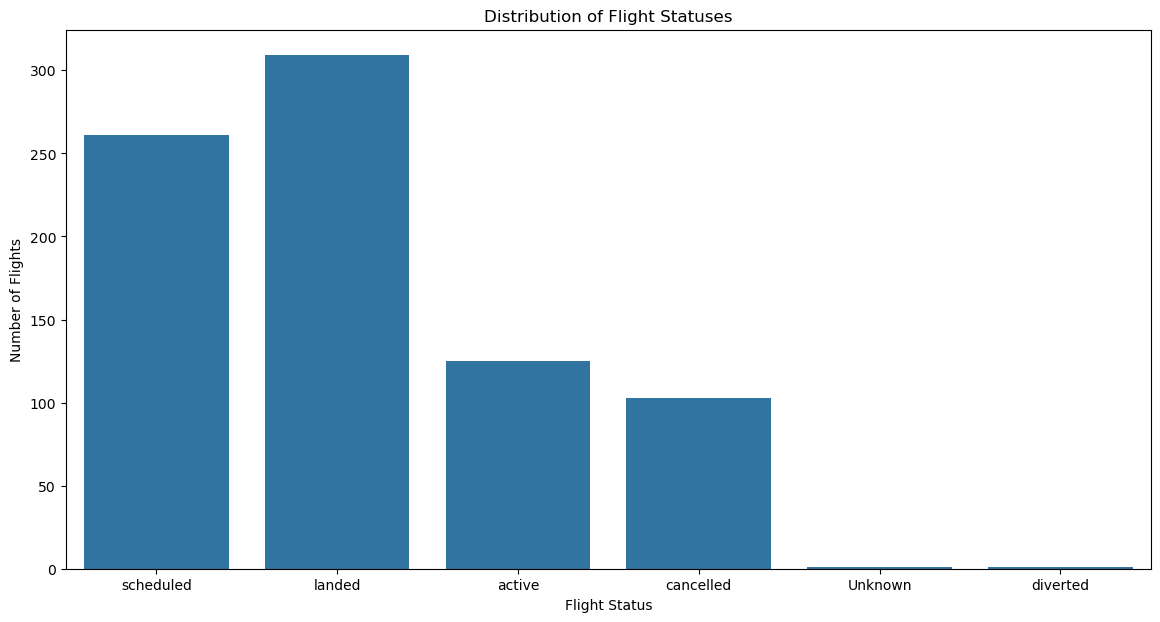

In [7]:
# Analyze and plot flight statuses
plt.figure(figsize=(14, 7))
sns.countplot(data=florida_flights, x='flight_status')
plt.title('Distribution of Flight Statuses')
plt.xlabel('Flight Status')
plt.ylabel('Number of Flights')
plt.show()

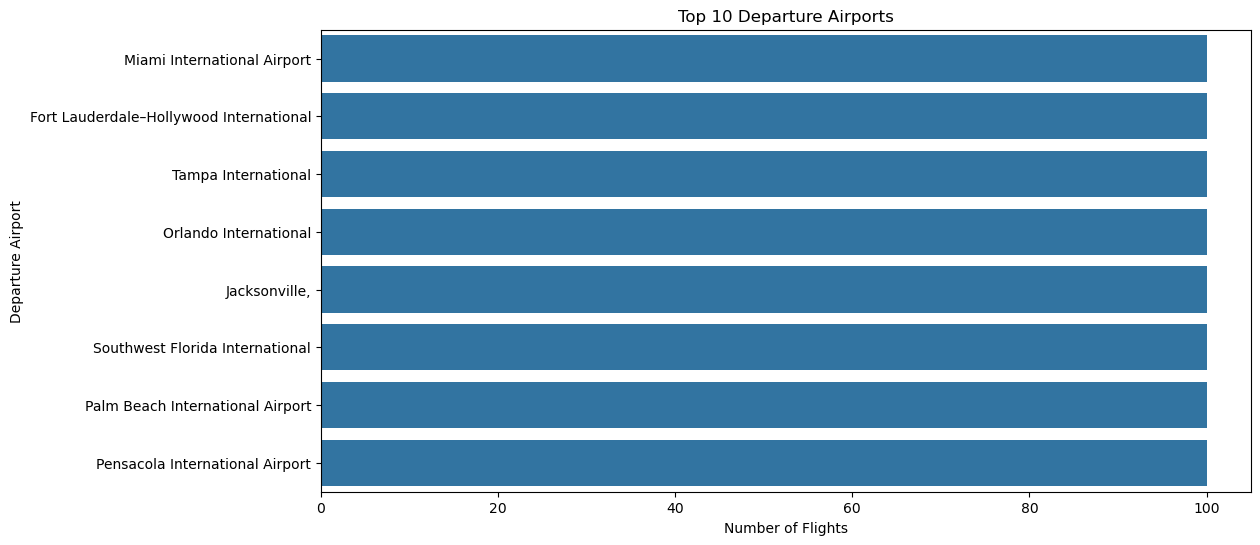

In [8]:
# Plot top 10 departure airports
top_departure_airports = florida_flights['departure.airport'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_departure_airports.values, y=top_departure_airports.index)
plt.title('Top 10 Departure Airports')
plt.xlabel('Number of Flights')
plt.ylabel('Departure Airport')
plt.show()

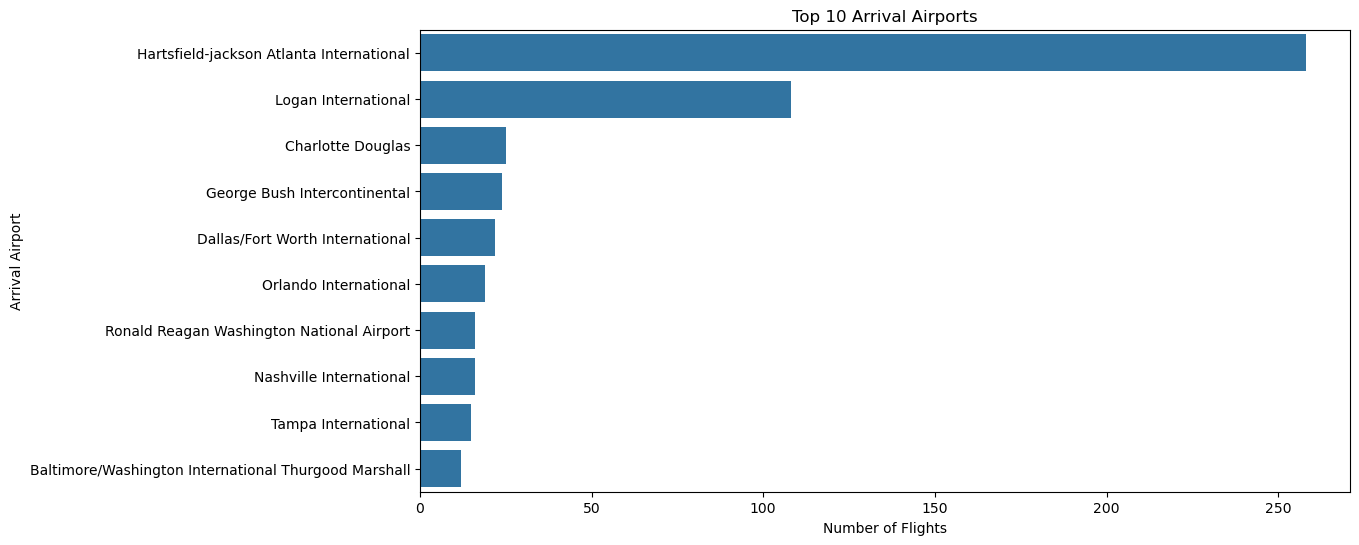

In [31]:
# Plot top 10 arrival airports
top_arrival_airports = florida_flights['arrival.airport'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_arrival_airports.values, y=top_arrival_airports.index)
plt.title('Top 10 Arrival Airports')
plt.xlabel('Number of Flights')
plt.ylabel('Arrival Airport')
plt.show()

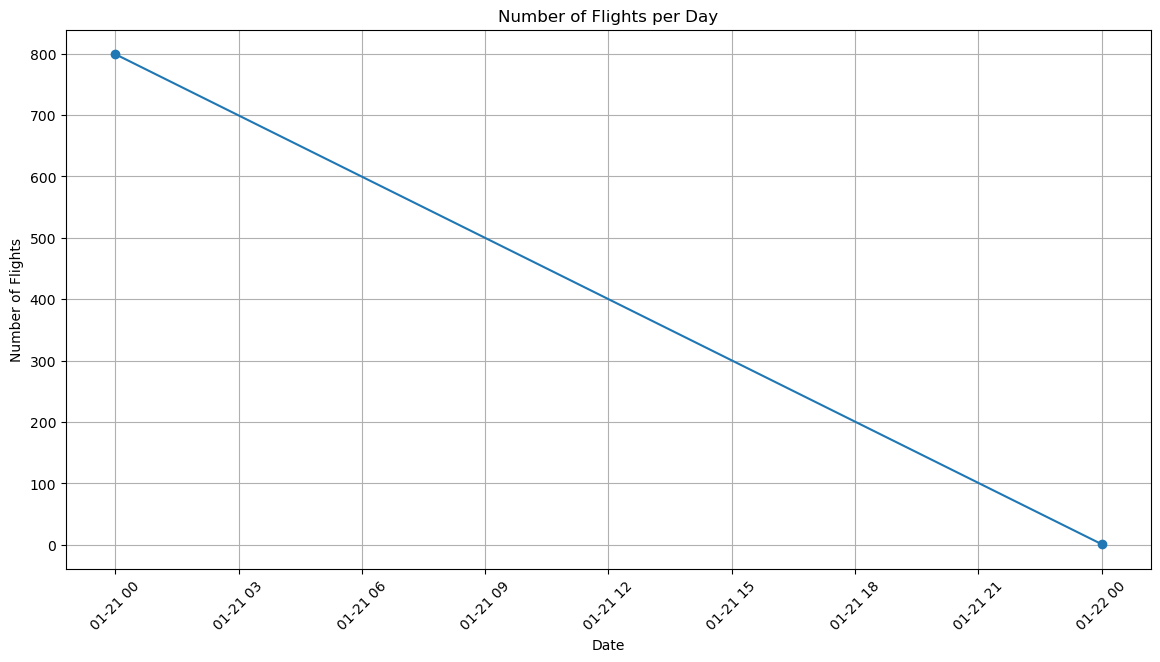

In [10]:
# Analyzing Trends
# Number of flights per day
flights_per_day = florida_flights.groupby('flight_date').size()

# Plot number of flights per day
plt.figure(figsize=(14, 7))
plt.plot(flights_per_day.index, flights_per_day.values, marker='o')
plt.title('Number of Flights per Day')
plt.xlabel('Date')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [11]:
# Convert columns to datetime if not already done
florida_flights['arrival.actual'] = pd.to_datetime(florida_flights['arrival.actual'], errors='coerce')
florida_flights['arrival.scheduled'] = pd.to_datetime(florida_flights['arrival.scheduled'], errors='coerce')

# Calculate delay in minutes only if both columns exist
if 'arrival.actual' in florida_flights.columns and 'arrival.scheduled' in florida_flights.columns:
    florida_flights['delay'] = (florida_flights['arrival.actual'] - florida_flights['arrival.scheduled']).dt.total_seconds() / 60
else:
    print("Required columns for delay calculation are missing.")

# Display the first few rows to verify the 'delay' column creation
print(florida_flights[['arrival.actual', 'arrival.scheduled', 'delay']].head())

             arrival.actual         arrival.scheduled  delay
0                       NaT 2025-01-22 03:00:00+00:00    NaN
1                       NaT 2025-01-21 14:50:00+00:00    NaN
2 2025-01-21 11:04:00+00:00 2025-01-21 11:20:00+00:00  -16.0
3                       NaT 2025-01-21 23:36:00+00:00    NaN
4                       NaT 2025-01-22 10:50:00+00:00    NaN


C:\Users\eadeo\AppData\Local\Temp\ipykernel_26340\1237027258.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  florida_flights['arrival.actual'] = pd.to_datetime(florida_flights['arrival.actual'], errors='coerce')


In [13]:
# Fill missing arrival.actual with arrival.scheduled values
florida_flights['arrival.actual'].fillna(florida_flights['arrival.scheduled'], inplace=True)

# Recalculate delay in minutes
florida_flights['delay'] = (florida_flights['arrival.actual'] - florida_flights['arrival.scheduled']).dt.total_seconds() / 60

# Display the first few rows to verify the 'delay' column
print(florida_flights[['arrival.scheduled', 'arrival.actual', 'delay']].head())

          arrival.scheduled            arrival.actual  delay
0 2025-01-22 03:00:00+00:00 2025-01-22 03:00:00+00:00    0.0
1 2025-01-21 14:50:00+00:00 2025-01-21 14:50:00+00:00    0.0
2 2025-01-21 11:20:00+00:00 2025-01-21 11:04:00+00:00  -16.0
3 2025-01-21 23:36:00+00:00 2025-01-21 23:36:00+00:00    0.0
4 2025-01-22 10:50:00+00:00 2025-01-22 10:50:00+00:00    0.0


C:\Users\eadeo\AppData\Local\Temp\ipykernel_26340\349711282.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  florida_flights['arrival.actual'].fillna(florida_flights['arrival.scheduled'], inplace=True)


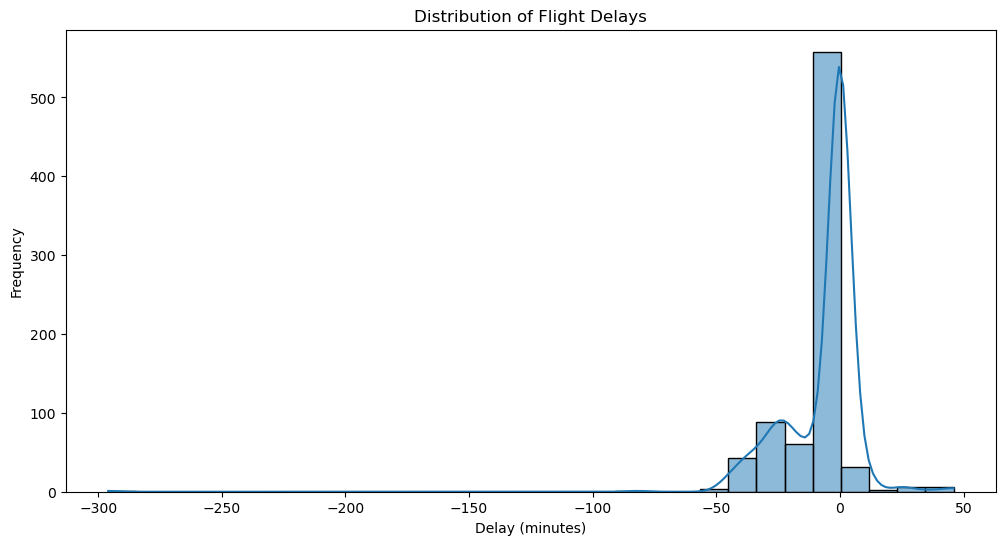

In [14]:
# Plot delay distribution
plt.figure(figsize=(12, 6))
sns.histplot(florida_flights['delay'].dropna(), bins=30, kde=True)
plt.title('Distribution of Flight Delays')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Analyze top 10 airlines with the longest average delays
avg_delay_by_airline = florida_flights.groupby('airline.name')['delay'].mean().sort_values(ascending=False)

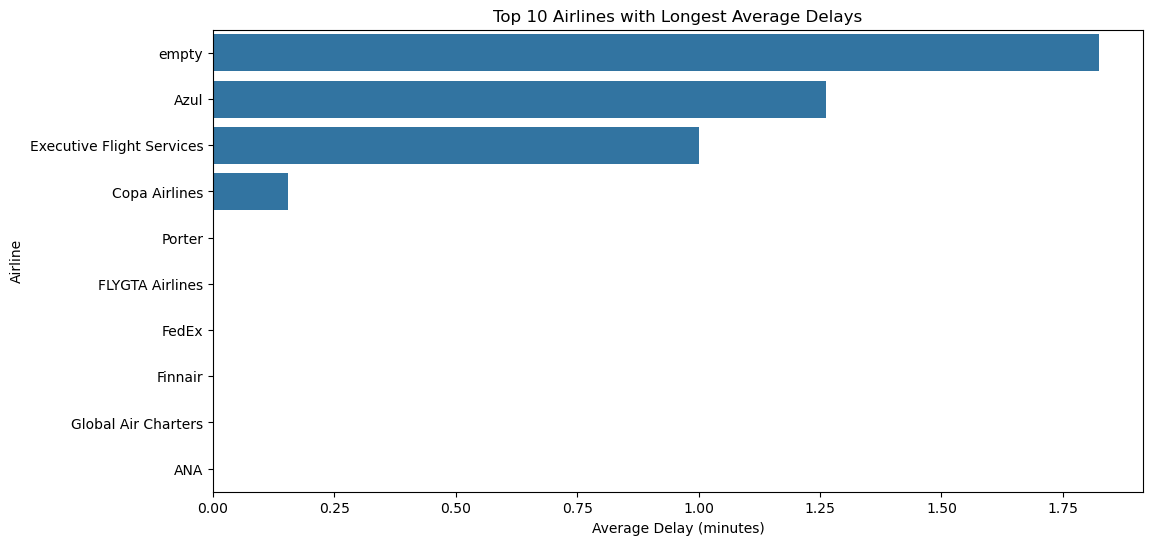

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_delay_by_airline.head(10).values, y=avg_delay_by_airline.head(10).index)
plt.title('Top 10 Airlines with Longest Average Delays')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Airline')
plt.show()

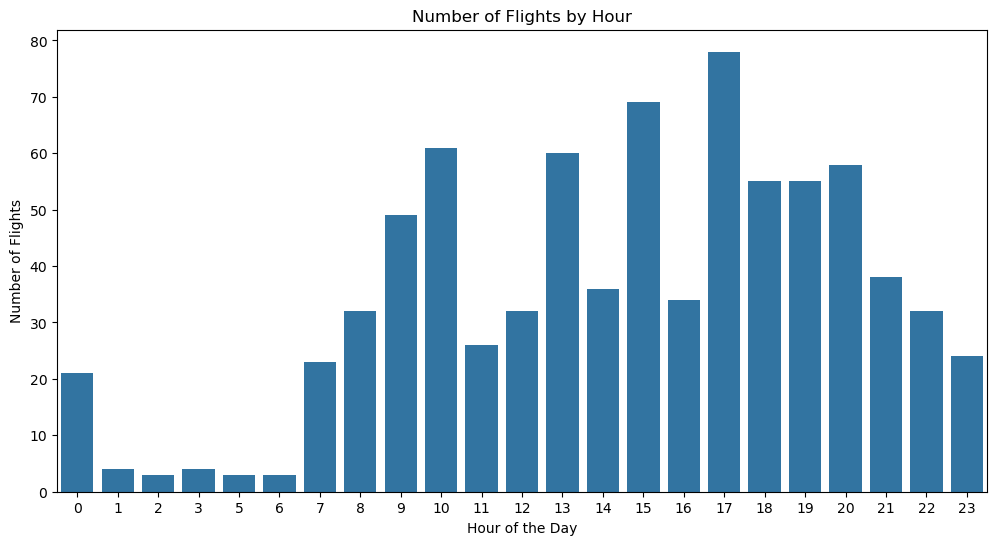

In [17]:
# Analyze peak hours for arrivals
florida_flights['arrival_hour'] = florida_flights['arrival.scheduled'].dt.hour

plt.figure(figsize=(12, 6))
sns.countplot(data=florida_flights, x='arrival_hour')
plt.title('Number of Flights by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Flights')
plt.show()

In [18]:
import numpy as np
# Replace 'Unknown' with np.nan
florida_flights.replace('Unknown', np.nan, inplace=True)

# Handle missing values
florida_flights.fillna(0, inplace=True)  # Example: Fill with 0 or use a more suitable value
# You can also choose to drop rows with missing values
# florida_flights.dropna(inplace=True)

# Verify the changes
print(florida_flights.head())


  flight_date flight_status  aircraft  live            departure.airport  \
0  2025-01-22     scheduled       0.0   0.0  Miami International Airport   
1  2025-01-21     scheduled       0.0   0.0  Miami International Airport   
2  2025-01-21        landed       0.0   0.0  Miami International Airport   
3  2025-01-21     scheduled       0.0   0.0  Miami International Airport   
4  2025-01-21     scheduled       0.0   0.0  Miami International Airport   

  departure.timezone departure.iata departure.icao departure.terminal  \
0   America/New_York            MIA           KMIA                  0   
1   America/New_York            MIA           KMIA                  0   
2   America/New_York            MIA           KMIA                  N   
3   America/New_York            MIA           KMIA                  N   
4   America/New_York            MIA           KMIA                  S   

  departure.gate  ...  live.updated live.latitude live.longitude  \
0              0  ...             0 

C:\Users\eadeo\AppData\Local\Temp\ipykernel_26340\3243177235.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  florida_flights.replace('Unknown', np.nan, inplace=True)


C:\Users\eadeo\AppData\Local\Temp\ipykernel_26340\2172352161.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(0, inplace=True)
C:\Users\eadeo\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


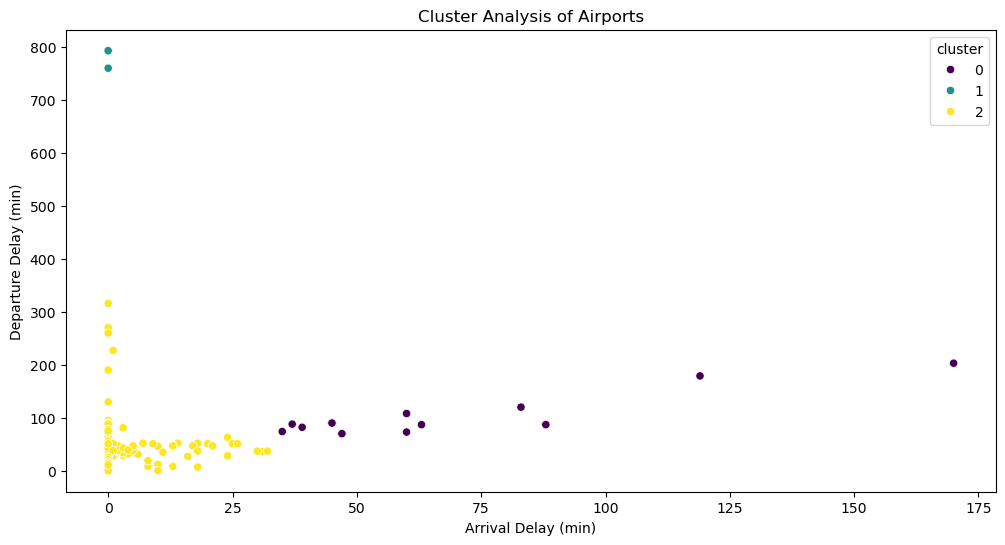

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = florida_flights[['arrival.delay', 'departure.delay']]

# Fill missing values with 0
features.fillna(0, inplace=True)

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
florida_flights['cluster'] = clusters

# Plot clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=florida_flights, x='arrival.delay', y='departure.delay', hue='cluster', palette='viridis')
plt.title('Cluster Analysis of Airports')
plt.xlabel('Arrival Delay (min)')
plt.ylabel('Departure Delay (min)')
plt.show()


In [20]:
!pip install geopandas

In [21]:
# Display available columns
print(florida_flights.columns)

Index(['flight_date', 'flight_status', 'aircraft', 'live', 'departure.airport',
       'departure.timezone', 'departure.iata', 'departure.icao',
       'departure.terminal', 'departure.gate', 'departure.delay',
       'departure.scheduled', 'departure.estimated', 'departure.actual',
       'departure.estimated_runway', 'departure.actual_runway',
       'arrival.airport', 'arrival.timezone', 'arrival.iata', 'arrival.icao',
       'arrival.terminal', 'arrival.gate', 'arrival.baggage', 'arrival.delay',
       'arrival.scheduled', 'arrival.estimated', 'arrival.actual',
       'arrival.estimated_runway', 'arrival.actual_runway', 'airline.name',
       'airline.iata', 'airline.icao', 'flight.number', 'flight.iata',
       'flight.icao', 'flight.codeshared', 'aircraft.registration',
       'aircraft.iata', 'aircraft.icao', 'aircraft.icao24',
       'flight.codeshared.airline_name', 'flight.codeshared.airline_iata',
       'flight.codeshared.airline_icao', 'flight.codeshared.flight_number',
  

In [22]:
# Test pulling data and inspecting
import requests
import json

# Import the Flight API key
from api_keys import flight_api_key

#api_key = 'API_KEY_HERE'

airport = 'MIA'  # Testing for one airport

url = f"http://api.aviationstack.com/v1/flights?access_key={flight_api_key}&dep_iata={airport}"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    # Print a sample of the data retrieved to inspect
    print(json.dumps(data, indent=4))
else:
    print(f"Failed to retrieve data: {response.status_code}")

{
    "pagination": {
        "limit": 100,
        "offset": 0,
        "count": 100,
        "total": 1443
    },
    "data": [
        {
            "flight_date": "2025-01-22",
            "flight_status": "scheduled",
            "departure": {
                "airport": "Miami International Airport",
                "timezone": "America/New_York",
                "iata": "MIA",
                "icao": "KMIA",
                "terminal": null,
                "gate": null,
                "delay": null,
                "scheduled": "2025-01-22T01:05:00+00:00",
                "estimated": "2025-01-22T01:05:00+00:00",
                "actual": null,
                "estimated_runway": null,
                "actual_runway": null
            },
            "arrival": {
                "airport": "Ted Stevens Anchorage International Airport",
                "timezone": "America/Anchorage",
                "iata": "ANC",
                "icao": "PANC",
                "terminal": null

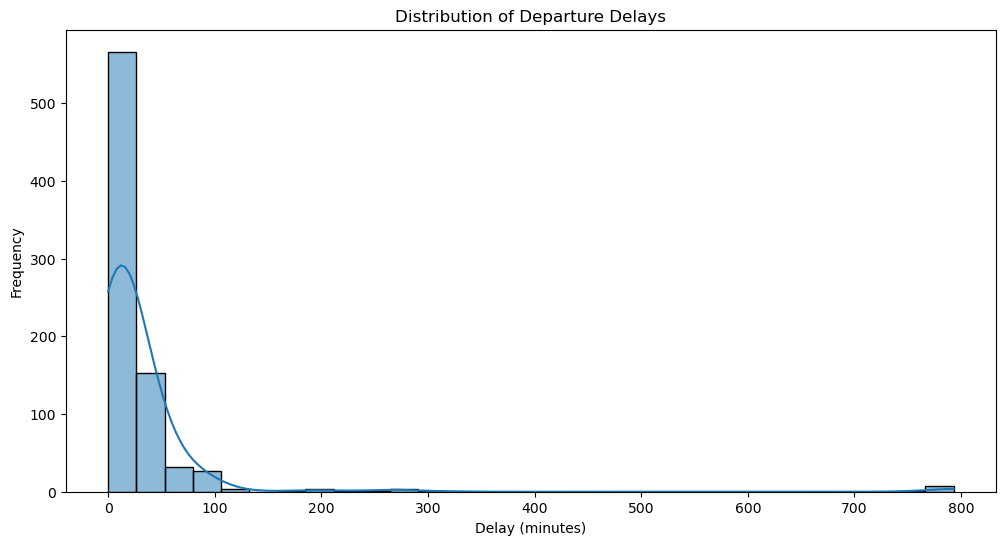

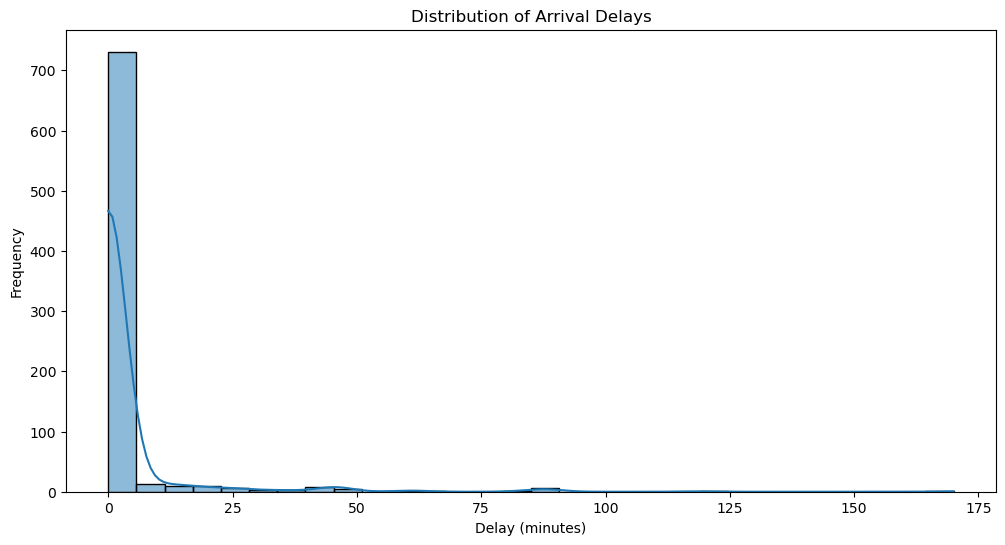

In [23]:
# Convert departure and arrival delays to numeric values
florida_flights['departure.delay'] = pd.to_numeric(florida_flights['departure.delay'], errors='coerce')
florida_flights['arrival.delay'] = pd.to_numeric(florida_flights['arrival.delay'], errors='coerce')

# Plot distribution of departure delays
plt.figure(figsize=(12, 6))
sns.histplot(florida_flights['departure.delay'].dropna(), bins=30, kde=True)
plt.title('Distribution of Departure Delays')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of arrival delays
plt.figure(figsize=(12, 6))
sns.histplot(florida_flights['arrival.delay'].dropna(), bins=30, kde=True)
plt.title('Distribution of Arrival Delays')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.show()




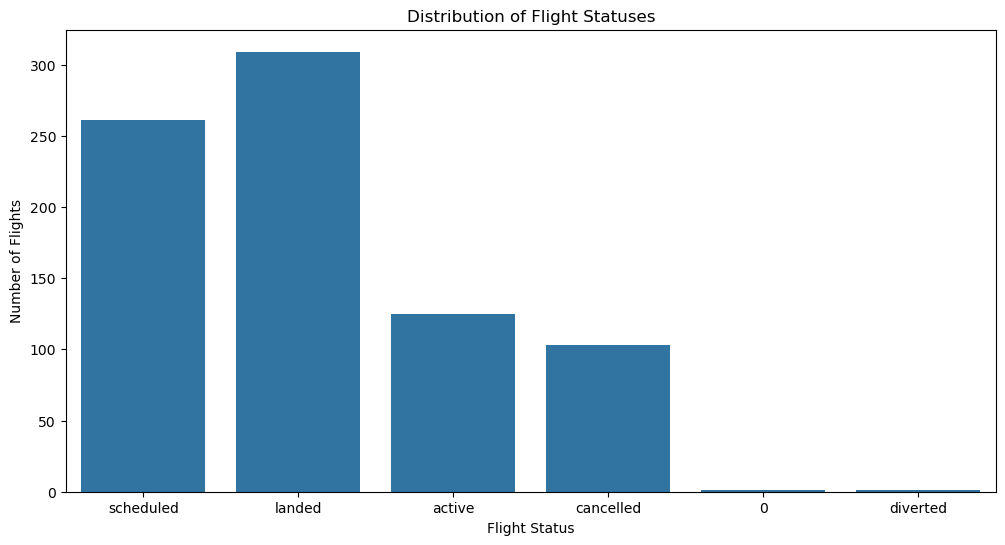

In [24]:
# Plot distribution of flight statuses
plt.figure(figsize=(12, 6))
sns.countplot(data=florida_flights, x='flight_status')
plt.title('Distribution of Flight Statuses')
plt.xlabel('Flight Status')
plt.ylabel('Number of Flights')
plt.show()

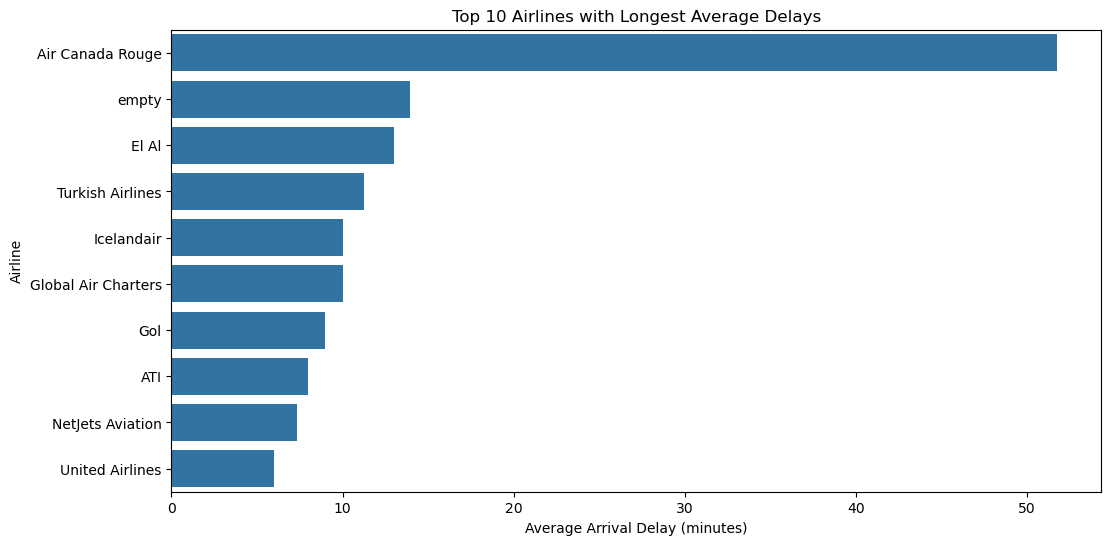

In [25]:
# Average delay per airline
avg_delay_by_airline = florida_flights.groupby('airline.name')['arrival.delay'].mean().sort_values(ascending=False)

# Plot top 10 airlines with the longest delays
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_delay_by_airline.head(10).values, y=avg_delay_by_airline.head(10).index)
plt.title('Top 10 Airlines with Longest Average Delays')
plt.xlabel('Average Arrival Delay (minutes)')
plt.ylabel('Airline')
plt.show()

In [26]:
!pip install folium

In [27]:
import folium

# Ensure correct coordinates and necessary data
florida_airports = {
    "Miami International Airport": [25.7959, -80.2871],
    "Orlando International Airport": [28.4312, -81.3081],
    "Tampa International Airport": [27.979, -82.537],
    "Jacksonville International Airport": [30.4941, -81.6879],
    "Fort Lauderdale-Hollywood International Airport": [26.0723, -80.1524],
    "Palm Beach International Airport": [26.6832, -80.0956],
    "Southwest Florida International Airport": [26.5429, -81.7552],
    "Pensacola International Airport": [30.4752, -87.1888],
    "Tallahassee International Airport": [30.3965, -84.3503]
}

# Create a map centered on Tallahassee, Florida
map = folium.Map(location=[30.4383, -84.2807], zoom_start=8)

for airport, coords in florida_airports.items():
    folium.Marker(location=coords, popup=folium.Popup(f'<strong>{airport}</strong>')).add_to(map)

# Save map to an HTML file in the same directory as your code
map_path = 'florida_airports_map.html'
map.save(map_path)
print(f"Map saved as '{map_path}'")

# Confirm saving finished successfully
import os
if os.path.exists(map_path):
    print(f"'{map_path}' saved successfully and is ready to be opened!")
else:
    print(f"Failed to save the map. Double-check file permissions and paths.")

Map saved as 'florida_airports_map.html'
'florida_airports_map.html' saved successfully and is ready to be opened!


In [28]:
from folium.plugins import HeatMap

# Create a map centered on Florida
map = folium.Map(location=[27.9944024,-81.7602544], zoom_start=6)  # Coordinates for center of Florida

# Sample flight density data (latitude, longitude)
flight_density = [
    [25.7959, -80.2871], [28.4312, -81.3081],
    [27.979, -82.537], [30.4941, -81.6879],
    [26.0723, -80.1524], [26.6832, -80.0956],
    [26.5429, -81.7552], [30.4752, -87.1888],
    [30.3965, -84.3503]
]

HeatMap(flight_density).add_to(map)

# Save heatmap to an HTML file
map.save('florida_airports_heatmap.html')
print("Heatmap saved as 'florida_airports_heatmap.html'")


Heatmap saved as 'florida_airports_heatmap.html'


In [29]:
import folium
from folium.plugins import HeatMap
import branca.colormap as cm
from IPython.display import display, HTML
# Create a map centered on Florida
map = folium.Map(location=[27.9944024, -81.7602544], zoom_start=6)  # Coordinates for center of Florida
# Sample flight density data (latitude, longitude)
flight_density = [
    [25.7959, -80.2871], [28.4312, -81.3081],
    [27.979, -82.537], [30.4941, -81.6879],
    [26.0723, -80.1524], [26.6832, -80.0956],
    [26.5429, -81.7552], [30.4752, -87.1888],
    [30.3965, -84.3503]
]
# Create the HeatMap layer
heatmap_layer = HeatMap(flight_density, name="HeatMap")
# Add the heatmap layer to the map
heatmap_layer.add_to(map)
# Add LayerControl to toggle layer
folium.LayerControl().add_to(map)
# Add color map legend (for visual purpose)
colormap = cm.LinearColormap(colors=['blue', 'green', 'yellow', 'red'], vmin=0, vmax=100)
colormap.caption = 'Flight Density'
map.add_child(colormap)
# Construct custom HTML and CSS
custom_html = """
<div id='dropdown' class='menu'>
    <select onchange="updateMap()">
        <option value="HeatMap">HeatMap</option>
        <!-- Add other options as needed -->
    </select>
</div>
<style>
    .menu {
        position: absolute;
        top: 10px;
        left: 10px;
        background: white;
        padding: 10px;
        border-radius: 5px;
    }
</style>
<script>
    function updateMap() {
        var selection = document.getElementById('dropdown').value;
        if (selection === 'HeatMap') {
            // Code to toggle HeatMap layer
        }
    }
</script>
"""
# Add the custom menu to the map
map.get_root().html.add_child(folium.Element(custom_html))
# Save map to an HTML file and display in Jupyter Notebook
map.save('florida_airports_heatmap.html')
display(HTML('florida_airports_heatmap.html'))
print("Heatmap with dropdown saved as 'florida_airports_heatmap.html'")

Heatmap with dropdown saved as 'florida_airports_heatmap.html'
